# Tour de France Exploratory Data Analysis
### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from geopy.geocoders import Nominatim

### Data Loading

In [2]:
stage_data = pd.read_csv("../data/stage_data.csv")

stages = pd.read_csv("../data/tdf_stages.csv")
#Add the year for each stage
stages["year"] = stages["Date"].apply(lambda date : date[:4])

winners = pd.read_csv("../data/tdf_winners.csv")

### Create new DataFrame with location coordinates
The following cells take several minutes to run

In [3]:
def create_coordinates(loc):
    try:
        geolocation = geolocator.geocode(loc)
        return (geolocation.longitude, geolocation.latitude)
    except:
        return

In [4]:
def create_country(loc):
    try:
        geolocation = geolocator.geocode(loc)
        return geolocation.address[geolocation.address.rfind(", ")+2:]
    except:
        return

In [7]:
locations = pd.DataFrame({"location" : list(set(stages.Destination).union(set(stages.Origin)))})
geolocator = Nominatim(user_agent="MyApp")
locations["coordinates"] = locations["location"].apply(create_coordinates)
locations["country"] = locations["location"].apply(create_country)
locations[["lat", "long"]] = pd.DataFrame(locations["coordinates"].tolist(), index=locations.index)

In [8]:
locations

,location,coordinates,country,lat,long
0,Harelbeke,"(3.3093368973972774, 50.844609649999995)",België / Belgique / Belgien,3.309337,50.844610
1,Col d'Izoard,"(6.7350408, 44.8200267)",France,6.735041,44.820027
2,Lavaur,"(1.0230515, 44.6129697)",France,1.023052,44.612970
3,Antwerp,"(4.3997081, 51.2211097)",België / Belgique / Belgien,4.399708,51.221110
4,Levallois-Perret,"(2.2881683, 48.892956)",France,2.288168,48.892956
...,...,...,...,...,...
751,Saint-Paul-Trois-Châteaux,"(4.7707325, 44.3475554)",France,4.770733,44.347555
752,Chamrousse,"(5.893161878703198, 45.1171487)",France,5.893162,45.117149
753,Dinant,"(4.9130588, 50.2591813)",België / Belgique / Belgien,4.913059,50.259181
754,Orange,"(-117.8704931, 33.7500378)",United States,-117.870493,33.750038


In [9]:
locations.to_csv("../data/locations.csv")

### Number of Tours de France

In [3]:
len(winners)

106

### Number of unique riders

In [4]:
len(set(stage_data.rider))

5162

### Number of stage locations

In [5]:
len(set(stages.Destination).union(set(stages.Origin)))

756

### Number of winners per country

In [6]:
winners_nat = pd.DataFrame(winners.nationality.value_counts()).reset_index()
winners_nat

,index,nationality
0,France,36
1,Belgium,18
2,Spain,12
3,Italy,10
4,United States,10
5,Great Britain,6
6,Luxembourg,5
7,Switzerland,2
8,Netherlands,2
9,Ireland,1


[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Number of TDF wins'),
 Text(0.5, 1.0, 'Number of TDF wins per country')]

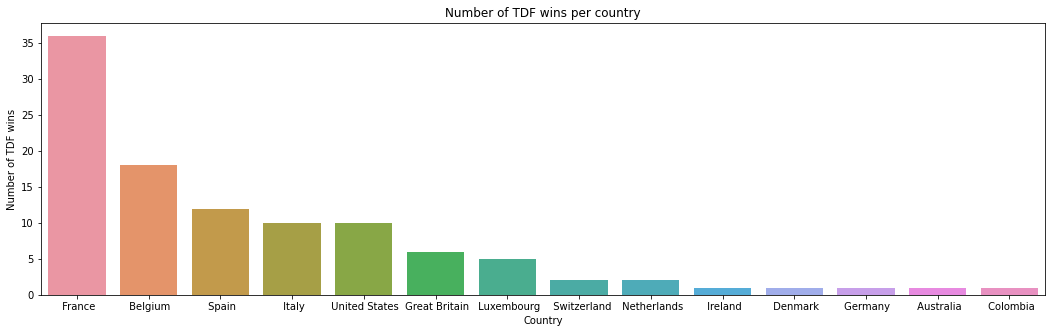

In [7]:
plt.figure(figsize=(18,5))
plot = sns.barplot(data=winners_nat, x="index", y="nationality")
plot.set(xlabel="Country", ylabel="Number of TDF wins", title="Number of TDF wins per country")

### Stage number and distance in the first and last 10 years

In [8]:
print(f"Mean number of stages during the first 10 years : {stages.groupby('year').size()[:10].mean()}")
print(f"Mean stage distance during the first 10 years : {stages.groupby('year').mean('Distance')[:10].mean()[0]:.2f}")
print(f"Mean number of stages during the first 10 years : {stages.groupby('year').size()[-10:].mean()}")
print(f"Mean stage distance during the first 10 years : {stages.groupby('year').mean('Distance')[-10:].mean()[0]:.2f}")

Mean number of stages during the first 10 years : 12.3
Mean stage distance during the first 10 years : 342.31
Mean number of stages during the first 10 years : 21.0
Mean stage distance during the first 10 years : 167.05


### Number of stages per TDF

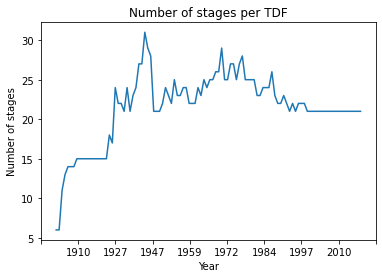

In [9]:
plot = sns.lineplot(data=stages.groupby("year").size())
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plot.set(xlabel="Year", ylabel="Number of stages", title="Number of stages per TDF")
plt.show()

### Mean distance of stages per TDF

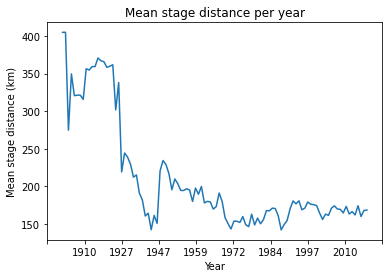

In [10]:
plot = sns.lineplot(data=stages.groupby("year").mean("Distance"))
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plot.set(xlabel="Year", ylabel="Mean stage distance (km)", title="Mean stage distance per year")
plt.legend([],[],frameon=False)
plt.show()

### Combine the two above

[Text(0, 0.5, 'Number of stages')]

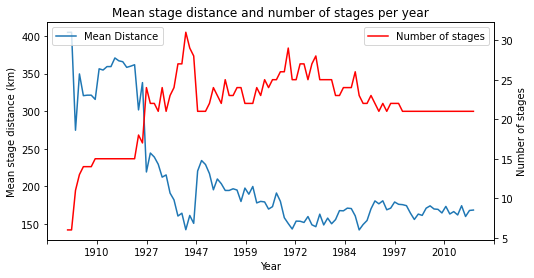

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
plot = sns.lineplot(data=stages.groupby("year").mean("Distance"), ax=ax)
ax.legend(["Mean Distance"], loc=2)
ax.set(xlabel="Year", ylabel="Mean stage distance (km)", title="Mean stage distance and number of stages per year")
ax2 = ax.twinx()
sns.lineplot(data=stages.groupby("year").size(), ax=ax2, color = "red")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
ax2.legend(["Number of stages"], loc=0)
ax2.set(ylabel="Number of stages")

### Number of riders per year

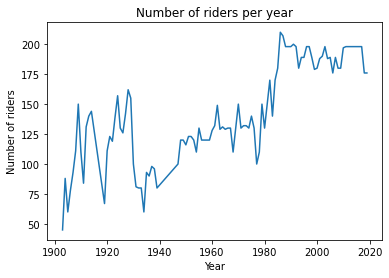

In [12]:
plot = sns.lineplot(data=stage_data.groupby("year")["rider"].nunique())
plot.set(xlabel="Year", ylabel="Number of riders", title="Number of riders per year")
plt.show()

### Rider who took part in most stages

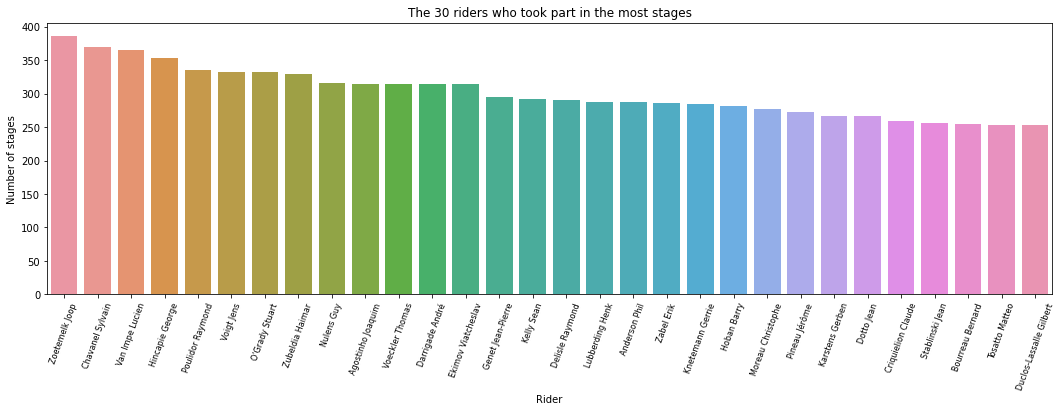

In [61]:
thirty_most_riders = stage_data.rider.value_counts()[:30].reset_index()
plt.figure(figsize=(18,5))
plot = sns.barplot(data=ten_most_riders, x="index", y="rider")
plot.set(xlabel="Rider", ylabel="Number of stages", title="The 30 riders who took part in the most stages")
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [62]:
print(thirty_most_riders.rider[0])
print(thirty_most_riders.rider.mean())

387
301.43333333333334


### Stages' countries

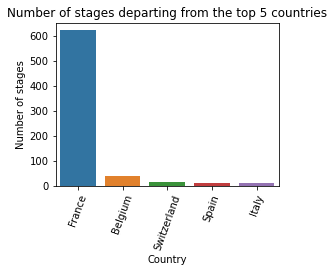

In [100]:
top5 = locations.country.value_counts()[:5].reset_index()
plt.figure(figsize=(4,3))
plot = sns.barplot(data=top5, x="index", y="country")
plot.set(xlabel="Country", ylabel="Number of stages", title="Number of stages departing from the top 5 countries")
plt.xticks(ticks=[0,1,2,3,4],labels=["France", "Belgium", "Switzerland", "Spain", "Italy"], rotation=70, fontsize=10)
plt.show()

### Winners' teams